In [1]:
import pickle

AA_seqs, thermo_data = pickle.load( open( "save.p", "rb" ) )

y_data = []
for i in thermo_data:
    y_data.append(float(i[1]))


In [2]:
parents = AA_seqs[0:3]

anything = AA_seqs


In [3]:
print (y_data)

[55.0, 43.0, 49.0, 39.8, 52.9, 48.8, 45.0, 48.3, 61.5, 54.6, 51.2, 47.3, 51.6, 45.4, 50.8, 43.3, 53.4, 49.1, 52.6, 39.2, 47.9, 46.8, 51.0, 47.8, 49.4, 53.3, 56.9, 46.0, 51.2, 50.6, 47.1, 45.7, 42.9, 47.9, 48.4, 48.7, 49.1, 52.6, 49.3, 47.3, 45.6, 63.2, 50.6, 50.7, 50.3, 51.3, 39.5, 48.9, 46.6, 54.9, 52.9, 53.0, 53.8, 48.7, 52.0, 50.8, 51.1, 60.0, 47.2, 51.7, 51.0, 49.0, 48.0, 42.4, 45.7, 50.5, 58.5, 56.9, 49.3, 47.4, 48.0, 49.9, 46.3, 49.5, 44.9, 51.0, 48.5, 52.8, 52.5, 42.5, 49.6, 45.4, 50.7, 52.4, 49.0, 50.1, 57.9, 53.7, 46.5, 50.5, 46.6, 58.9, 50.5, 54.9, 51.3, 49.9, 62.4, 44.8, 48.3, 47.9, 50.4, 51.9, 56.1, 54.2, 44.0, 54.8, 50.6, 40.6, 55.7, 51.8, 47.5, 46.4, 58.5, 45.5, 50.9, 49.3, 50.3, 53.8, 53.0, 48.8, 55.3, 49.5, 50.4, 51.0, 47.4, 43.5, 50.9, 49.4, 46.3, 48.4, 43.9, 52.3, 64.4, 53.1, 43.1, 50.1, 51.4, 50.9, 47.2, 54.9, 61.2, 51.9, 54.4, 47.7, 50.6, 46.3, 50.5, 54.3, 44.0, 43.6, 56.9, 60.0, 43.1, 48.8, 56.3, 48.8, 53.0, 53.0, 56.2, 46.7, 48.4, 57.2, 47.1, 49.7, 47.8, 49.1, 48.

In [4]:
# This function one-hot encodes a list of sequences based on the parents
# anything - a list variable containing strings that represent each of the sequences to be encoded
# parents - a list variable containting strings of the sequences that all of the sequences are based on
# interval - the number of characters that separate each individual position. Ex: For DNA codons interval = 3
# return anything_encoded - a list containing a list for each one-hot encoded sequence
# return pos_coding - a list variable used for decoding sequences
def oneHotEncodeOptimizedv2 (anything, parents, interval=1):
    #    First creates a matrix called pos_coding of all the possible positions
    #    Ex: If parents are ['ATR', 'AYR', 'RQR'] with interval=1, then pos_coding =
    #    |[A, R]   |
    #    |[T, Y, Q]|
    #    |[R]      |
    #    pos_coding is also used in the decoding algorithm
    pos_coding = []
    # At each position in the sequences:
    for i in range(int(len(parents[0])/interval)):
        pos_coding.append([])
        # Each new code will be appended to the list of codes for that position
        for j in range(len(parents)):
            if (pos_coding[i].count(parents[j][i*interval:(i+1)*interval])==0):
                pos_coding[i].append(parents[j][i*interval:(i+1)*interval])
    # Encoding algorithm
    anything_encoded = []
    for i in range(len(anything)):
        # Appends a 1 to the first position of each encoded sequence for normalization
        individual_encoded = [1]
        for j in range(len(pos_coding)):
            pos = anything[i][j*interval:(j+1)*interval]
            num = pos_coding[j].index(pos)
            # Appends a 0 for when the code equals one of the codes in pos_coding for that position
            for k in range(len(pos_coding[j])-1):
                if ((k+1)==num):
                    individual_encoded.append(1)
                else:
                    individual_encoded.append(0)
        # Appends the individual sequence to the list of encoded sequences
        anything_encoded.append(individual_encoded)
    
    return anything_encoded, pos_coding

# This function decodes a list of sequences that have been one-hot encoded by the oneHotEncodeOptimizedv2 function
# anything - a list/matrix of one hot-encoded sequences
# pos_coding - a list variable obtained when one-hot encoding the original sequences
# interval - the number of characters that separate each individual position. Ex: For DNA codons interval = 3
# returns anything_decoded - a list variable containting strings of the decoded sequences
def decodeOneHotEncodeOptimizedv2 (anything, pos_coding, interval=1):
    
    anything_decoded = []
    for i in range(len(anything)):
        # decodes each individual and appends it to a list of all decoded sequences
        individual_encoded = anything[i].copy()
        # removes the first normalizing 1 before decoding
        individual_encoded.remove(1)
        individual_decoded = ''
        curr_pos = 0                                    
        for j in range(len(pos_coding)):
            # grabs the code for a single position and then decodes it
            pos = individual_encoded[curr_pos:curr_pos+interval*(len(pos_coding[j])-1)]
            try:
                #searches for a 1
                ind = pos.index(1)
                # appends the matching parent's original code
                individual_decoded = individual_decoded + pos_coding[j][ind+1]
            except ValueError:
                # this is reached if the current position is the same as in parent 1 -> appends parent 1 for this pos
                individual_decoded = individual_decoded + pos_coding[j][0]
            curr_pos += len(pos_coding[j])-1
        anything_decoded.append(individual_decoded)
    return anything_decoded


In [5]:
AA_seqs_encoded, pos_coding = oneHotEncodeOptimizedv2(anything, parents)

AA_seqs_decoded = decodeOneHotEncodeOptimizedv2(AA_seqs_encoded, pos_coding)


Code to test oneHotEncode and decodeOneHotEncode methods

#parents = ['AAACCCTTT','AAACCGTTT','ACACCATTT']
#anything = ['AAACCCTTT','AAACCGTTT','ACACCATTT','ACACCCTTT','AAACCATTT','ACACCGTTT']
parents = ['AAAAAA','CCCCCC','GGGGGG','ACTACT']
anything = ['AAAAAA','CCCCCC','GGGGGG','ACTACT','AAACCC','GGGACT']

print (anything)

code, pos_coding = oneHotEncodeOptimizedv2(anything, parents, 1)
decode = decodeOneHotEncodeOptimizedv2(code,pos_coding)


print(decode)


#Ensures that sequences are being encoded and decoded properly such that no data is lost <br />
print (AA_seqs == AA_seqs_decoded)

In [6]:
# Least squares linear regression function

import numpy as np

# X - a numpy array representing the independent variable/sequence
# y - a numpy array representing the dependent variable
# Returns a beta_hat such that y=BX where beta_hat reduces the least square error
def LinearRegressionV1(X, y):
    beta_hat = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return beta_hat
    

In [7]:
# Ridge regression function

# X - a numpy array representing the independent variable/sequence
# y - a numpy array representing the dependent variable
# Returns beta_hat_R such that y=BX where beta_hat reduces the least squares error and the coefficients of beta_hat_R
def RidgeRegressionV1(X, y, l=0):
    beta_hat_R = np.linalg.pinv(X.transpose().dot(X)+l*np.identity(len(X[0]))).dot(X.transpose()).dot(y)
    return beta_hat_R

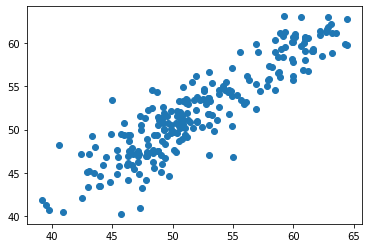

r = 0.9023017842213618
mserr = 6.167154083424245


In [8]:
# 10% Cross Validation with Least Squares Linear Regression
import random
random.seed(10)

# First divide up the indexes into 10 different random test sets
test_sets = [[] for i in range(10)] # Ten empty lists
total = [i for i in range (len(AA_seqs_encoded))] # List of all possible indexes of data
for i in range (len(AA_seqs_encoded)):
    rand_ind = random.randint(0,len(total)-1)
    test_sets[i%10].append(total.pop(rand_ind))


# Now create 10 regression models based on each train set and predict y values from the test set for each one
y_hats = []
y_actual = []
mse = 0
for i in range(10):
    # Initialize train and test set
    copy_train_X, copy_train_y, copy_test_X, copy_test_y = ([] for j in range(4))
    for j in range(len(AA_seqs_encoded)):
        if j in test_sets[i]:
            copy_test_X.append(AA_seqs_encoded[j])
            copy_test_y.append(y_data[j])
        else:
            copy_train_X.append(AA_seqs_encoded[j])
            copy_train_y.append(y_data[j])
    train_X = np.array(copy_train_X)
    train_y = np.array(copy_train_y)
    test_X = np.array(copy_test_X)
    test_y = np.array(copy_test_y)
    # Linear regression model
    beta_hat = LinearRegressionV1(train_X, train_y)
    
    for i in range(len(test_y)):
        y_hats.append(beta_hat.dot(test_X[i]))
        y_actual.append(test_y[i])
        mse += (test_y[i]-beta_hat.dot(test_X[i]))**2

r = np.corrcoef(np.array(y_actual), np.array(y_hats))[0][1]
mse = mse/len(y_actual)
import matplotlib.pyplot as plt
plt.plot(y_actual,y_hats,'o')
plt.show()
print ('r = ' + str(r))
print ('mserr = ' + str(mse))
        

In [9]:
# Leave-One-Out Cross Validation Function

# X - a list representing the independent variable/sequence
# y - a list representing the dependent variable
# model - a function that runs some form of regression
# Returns y_hats - the predicted value of X[i] is represented as y_hats[i]
# Returns r - the correlation coefficient for this model
# Returns mserr - the mean square error for this model
def leaveOneOutCV(X, y, model, l=0):
    y_hats = []
    mserr = 0
    for i in range(len(X)):
        train_X = X.copy()
        train_y = y.copy()
        train_X.pop(i)
        train_y.pop(i)
        train_X = np.array(train_X)
        train_y = np.array(train_y)
        beta = 0
        if (model == LinearRegressionV1):
            beta = model(train_X, train_y)
        elif (model == RidgeRegressionV1):
            beta = model(train_X, train_y, l) #Could condense these if statements into 2 lines with ridge reg
        y_hats.append(beta.dot(X[i]))
        mserr += (y[i]-beta.dot(X[i]))**2
    mserr = mserr/len(X)
    r = np.corrcoef(np.array(y),np.array(y_hats))[0][1]
    return y_hats, r, mserr
    

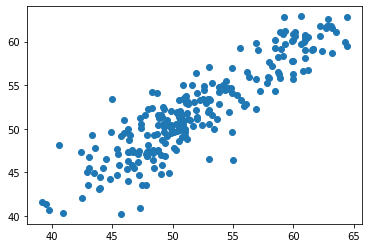

0.9001551492371886
6.298191502700996


In [10]:
# Leave-One-Out CV function check 
y_hats, r, mserr = leaveOneOutCV(AA_seqs_encoded, y_data, RidgeRegressionV1)

import matplotlib.pyplot as plt
plt.plot(y_data,y_hats,'o')
plt.show()
print (r)
print (mserr)

In [11]:
# 10% Cross Validation Function

# X - a list representing the independent variable/sequence
# y - a list representing the dependent variable
# model - a function that runs some form of regression
# seed - sets a seed for randomly selecting the 10 lists
# Returns y_actual - values of y, in different order
# Returns y_hats - the predicted value of X[i] is represented as y_hats[i]
# Returns r - the correlation coefficient for this model
# Returns mserr - the mean square error for this model


def tenPercentCV(X, y, model, seed = 10, l=0):
    # Sets a seed 
    import random
    random.seed(seed)
    
    # First divide up the indexes into 10 different random test sets
    test_sets = [[] for i in range(10)] # Ten empty lists
    total = [i for i in range (len(X))] # List of all possible indexes of data
    for i in range (len(X)):
        rand_ind = random.randint(0,len(total)-1)
        test_sets[i%10].append(total.pop(rand_ind))

    # Now create 10 regression models based on each train set and predict y values from the test set for each one
    y_hats = []
    y_actual = []
    mse = 0
    for i in range(10):
        # Initialize train and test set
        copy_train_X, copy_train_y, copy_test_X, copy_test_y = ([] for j in range(4))
        for j in range(len(X)):
            if j in test_sets[i]:
                copy_test_X.append(X[j])
                copy_test_y.append(y[j])
            else:
                copy_train_X.append(X[j])
                copy_train_y.append(y[j])
        train_X = np.array(copy_train_X)
        train_y = np.array(copy_train_y)
        test_X = np.array(copy_test_X)
        test_y = np.array(copy_test_y)
        beta = 0
        if (model == LinearRegressionV1):
            beta = model(train_X, train_y)
        elif (model == RidgeRegressionV1):
            beta = model(train_x, train_y, l) #Could condense these if statements into 2 lines with ridge reg
        # Predicts y values and appends them to their respective lists
        for i in range(len(test_y)):
            y_hats.append(beta.dot(test_X[i]))
            y_actual.append(test_y[i])
            mse += (test_y[i]-beta.dot(test_X[i]))**2
            
    r = np.corrcoef(np.array(y_actual), np.array(y_hats))[0][1]
    mse = mse/len(y_actual)

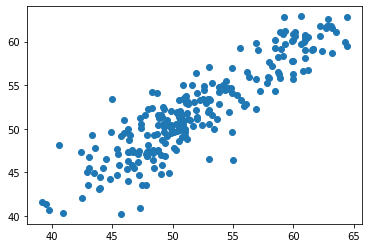

0.9001551492371886
6.298191502700996


In [51]:
# 10% CV function check
y_hats, r, mserr = leaveOneOutCV(AA_seqs_encoded, y_data, RidgeRegressionV1)

import matplotlib.pyplot as plt
plt.plot(y_data,y_hats,'o')
plt.show()
print (r)
print (mserr)

In [35]:
lambdas = np.logspace(-10, 1.5)
#print (lambdas)

mserrs = []

for i in lambdas:
    Y_hats, r, mserr = leaveOneOutCV(AA_seqs_encoded, y_data, RidgeRegressionV1, i)
    mserrs.append(mserr)


[-23.025850929940457, -22.485448306074506, -21.94504568220856, -21.404643058342607, -20.86424043447666, -20.32383781061071, -19.78343518674476, -19.243032562878813, -18.702629939012862, -18.16222731514691, -17.62182469128096, -17.081422067415012, -16.541019443549065, -16.000616819683113, -15.460214195817162, -14.919811571951213, -14.379408948085263, -13.839006324219314, -13.298603700353365, -12.758201076487415, -12.217798452621466, -11.677395828755516, -11.136993204889567, -10.596590581023618, -10.056187957157668, -9.515785333291719, -8.97538270942577, -8.434980085559818, -7.89457746169387, -7.35417483782792, -6.813772213961971, -6.273369590096022, -5.732966966230072, -5.192564342364123, -4.652161718498173, -4.111759094632222, -3.571356470766273, -3.0309538469003234, -2.490551223034374, -1.9501485991684249, -1.4097459753024755, -0.8693433514365261, -0.32894072757057685, 0.2114618962953725, 0.7518645201613219, 1.2922671440272713, 1.8326697678932207, 2.3730723917591696, 2.913475015625119

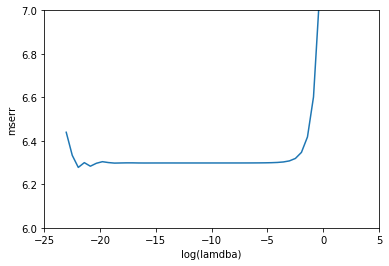

In [36]:
import matplotlib.pyplot as plt

ls = []
for i in range(len(lambdas)):
    ls.append(np.log(lambdas[i]))
print (ls)

plt.plot(ls,mserrs)
plt.xlabel('log(lamdba)')
plt.ylabel('mserr')
plt.axis([-25,5,6,7])
print (mserrs)
plt.show()

In [37]:
print(lambdas[mserrs.index(min(mserrs))])
std_l = lambdas[mserrs.index(min(mserrs))]

2.94705170255181e-10


In [49]:
#Generate Machine Learning Curve

#Set aside 10% of the data, this will be used to assess the error of each model

def predictTestSet(train_X, train_y, model, test_X, test_y, l=0):
    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)
    beta = 0
    if (model == LinearRegressionV1):
        beta = model(train_X, train_y)
    elif (model == RidgeRegressionV1):
        beta = model(train_X, train_y, l) #Could condense these if statements into 2 lines with ridge reg
    y_hats = []
    mserr = 0
    for i in range(len(test_X)):
        y_hat = beta.dot(test_X[i])
        y_hats.append(y_hat)
        mserr += (y_hat-test_y[i])**2
    r = np.corrcoef(test_y, np.array(y_hats))[0][1]
    return y_hats, r, mserr

X = AA_seqs_encoded
y = y_data

seed = 10

import random
random.seed(seed)



test_set_X = []
test_set_y = []
total_train_set_X = []
total_train_set_y = []
total = [i for i in range (len(X))] # List of all possible indexes of data

for i in range (len(X)):
    rand_ind = random.randint(0,len(total)-1)
    ind = total.pop(rand_ind)
    if (i%10 == 0):
        test_set_X.append(X[ind])
        test_set_y.append(y[ind])
    else:
        total_train_set_X.append(X[ind])
        total_train_set_y.append(y[ind])


#Run a simulations for 10 numbers of data points
train_sizes = [i+1 for i in range(30)]
print(train_sizes)
mserr_ML_curve = []
r_ML_curve = []
for i in train_sizes:
    total_train_set_X_c = total_train_set_X.copy()
    total_train_set_y_c = total_train_set_y.copy()
    train_X = []
    train_y = []
    for j in range(i):
        rand_ind = random.randint(0,len(total_train_set_X_c)-1)
        train_X.append(total_train_set_X_c.pop(rand_ind))
        train_y.append(total_train_set_y_c.pop(rand_ind))
    y_hats, r, mserr = predictTestSet(train_X, train_y, RidgeRegressionV1, test_set_X, test_set_y, std_l)
    mserr_ML_curve.append(mserr)
    r_ML_curve.append(r)
    
        


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


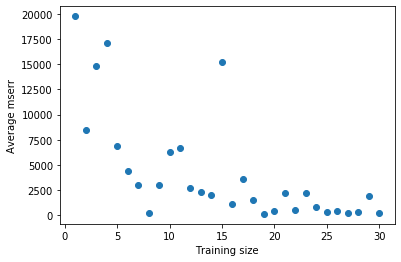

In [50]:
plt.plot(train_sizes,mserr_ML_curve,'o')
plt.xlabel('Training size')
plt.ylabel('Average mserr')
plt.show()